In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_to_load_df = pd.read_csv(city_data_to_load)
ride_data_to_load_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_df = pd.merge(ride_data_to_load_df, city_data_to_load_df, how='inner', on='city')

# Display the data table for preview

combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [3]:
combined_df = combined_df.fillna(0)

combined_dff = combined_df.set_index("city")

city_mean = combined_dff.groupby("city")["fare"].mean()

city_driver = combined_dff.groupby("city")["driver_count"].mean()
city_ride = combined_dff.groupby("city")["ride_id"].count()
city_df = city_data_to_load_df.set_index("city")
city_col = city_df.drop(columns = "driver_count")

## Bubble Plot of Ride Sharing Data

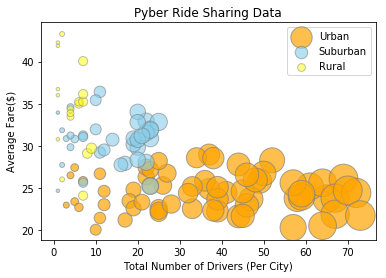

In [4]:
# Obtain the x coordinates for each of the three city types

bubble_data = pd.DataFrame({"Average Fare($)": city_mean,
               "Total Number of Drivers (Per City)": city_driver,
               "Total Numbers of Rides": city_ride,
               "Type": city_col["type"]
              })

# Obtain the y coordinates for each of the three city types

urban_type = bubble_data.loc[bubble_data["Type"]== "Urban"]
sub_type = bubble_data.loc[bubble_data["Type"]== "Suburban"] 
rural_type = bubble_data.loc[bubble_data["Type"]== "Rural"]

# Build the scatter plots for each city types and Incorporate the other graph properties and 
# Incorporate a text label regarding circle size

plt.scatter(urban_type["Total Number of Drivers (Per City)"], urban_type["Average Fare($)"],
                            s=urban_type["Total Number of Drivers (Per City)"]*12, color = "orange", alpha = .7, 
                            edgecolor='grey', label = "Urban", linewidth=1)
plt.scatter(sub_type["Total Number of Drivers (Per City)"], sub_type["Average Fare($)"],
                            s=sub_type["Total Number of Drivers (Per City)"]*12, color = "skyblue", alpha = .6, 
                            edgecolor='grey', label = "Suburban", linewidth=1)
plt.scatter(rural_type["Total Number of Drivers (Per City)"], rural_type["Average Fare($)"],
                            s=rural_type["Total Number of Drivers (Per City)"]*12, color = "yellow", alpha = .5, 
                            edgecolor='grey', label = "Rural", linewidth=1)



# Labels, legend and title for the plot

plt.ylabel("Average Fare($)") 
plt.xlabel("Total Number of Drivers (Per City)")
plt.legend(loc = "best") 
plt.title("Pyber Ride Sharing Data") 

# Save Figure

plt.savefig("../Images/PyberRide.png")

# Show plot
plt.show()

## Total Fares by City Type

In [9]:
# Calculate Type Percents

def getfares(group):
    return {'fare': group.sum()}
groupby_fare = combined_df['fare'].groupby(combined_df['type']).apply(getfares).unstack()
groupby_fare['type'] = groupby_fare.index

groupby_fare

,fare,type
type,,
Rural,4327.93,Rural
Suburban,19356.33,Suburban
Urban,39854.38,Urban


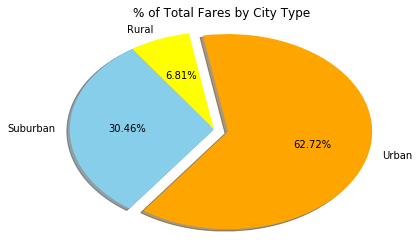

In [6]:
# Build Pie Chart

explode = (0, 0, 0.1)
colors = ("yellow", "skyblue", "orange")

plt.pie(groupby_fare['fare'], labels = groupby_fare['type'], explode=explode, colors=colors,
        startangle = 100, shadow = True, autopct ="%1.2f%%")

plt.axis("auto")
plt.title("% of Total Fares by City Type")

# Save Figure

plt.savefig("../Images/FarePercentage.png")

# Show Figure
plt.show()

In [7]:
# Observation: Urban cities shows more fare collection and seems to be more growth opportunities in the area. 
# As plot shows, urban cities collected the more than 62% fare compared to suburban has 30# and rural has 7%. 
# This clearly shows urban are has more demand for ride sharing.

## Total Rides by City Type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64


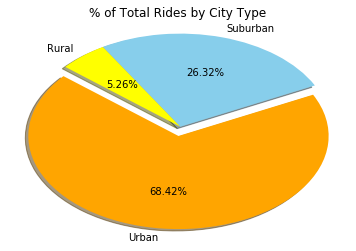

In [8]:
# Calculate Ride Percents

city_count = combined_df["type"].value_counts()
print(city_count)

# Build Pie Chart

explode = (0.1, 0, 0)
colors = ("orange", "skyblue", "yellow")

plt.pie(city_count, labels = city_count.keys(), explode=explode, colors=colors,
        startangle = 140, shadow = True, autopct ="%1.2f%%")

plt.axis("auto")
plt.title("% of Total Rides by City Type")


# Save Figure

plt.savefig("../Images/RidePercentage.png")

# Show Figure
plt.show()

In [ ]:
# Urban area has 68% (1625) rides compare to suburban has 26% (625) and rural has 5% (125). 
# It shows the demand and requiremnet in of sharing rides in urban is higher.
# So, it shows the trend for business growth for ride sharing companies.

## Total Drivers by City Type

In [47]:
# Calculate Driver Percents

def getdrivers(group):
    return {'drivers': group.sum()}
groupby_driver = city_data_to_load_df['driver_count'].groupby(city_data_to_load_df['type']).apply(getdrivers).unstack()
groupby_driver['type'] = groupby_driver.index

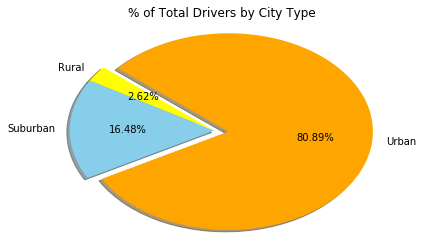

In [48]:
# Build Pie Charts

explode = (0, 0, 0.1)
colors = ("yellow", "skyblue", "orange")

plt.pie(groupby_driver["drivers"], labels=groupby_driver['type'], explode=explode, colors=colors,
        startangle = 140, shadow = True, autopct ="%1.2f%%")

plt.axis("auto")
plt.title("% of Total Drivers by City Type")

# Save Figure

plt.savefig("../Images/TotalDrivers.png")

# Show Figure
plt.show()

In [ ]:
# As above plots shows there is more demand for ride sharing rides in the urban area, more drivers are 
# interested to dive in the urban area to get more rides and eventually fare.